# DSCI 503 - Homework 05
Matt Snyder

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1: Working with 2D Arrays

In [2]:
# Set a seed of 1.
np.random.seed(1)

# Use np.random.uniform to create a 5x8 array of elements sampled uniformly from the interval [0,10]. Name this array Z.
Z = np.random.uniform(low=0, high=10, size=(5,8))

# Round the elements of Z to two decimal places, storing the results back into Z.
Z = np.round(Z, 2)

# Print Z.
print (Z)

[[4.17 7.2  0.   3.02 1.47 0.92 1.86 3.46]
 [3.97 5.39 4.19 6.85 2.04 8.78 0.27 6.7 ]
 [4.17 5.59 1.4  1.98 8.01 9.68 3.13 6.92]
 [8.76 8.95 0.85 0.39 1.7  8.78 0.98 4.21]
 [9.58 5.33 6.92 3.16 6.87 8.35 0.18 7.5 ]]


In [6]:
# Use a single cell to print the 3rd row and 6th column of Z. Display your results as shown below.
# NOTE: assuming 3rd means index 3 and 6th means index 6, based on the labels in the output specification
print (f'Row 3:    {Z[3,:]}')
print (f'Column 6: {Z[:,6]}')

Row 3:    [8.76 8.95 0.85 0.39 1.7  8.78 0.98 4.21]
Column 6: [1.86 0.27 3.13 0.98 0.18]


In [8]:
# Use np.sum() to calculate the column sum and row sum for Z, as well as the sum of the entire array. 
print (f'Row Sums:    {np.sum(Z, axis=1)}')
print (f'Column Sums: {np.sum(Z, axis=0)}')
print (f'Array Sum:   {np.sum(Z)}')

Row Sums:    [22.1  38.19 40.88 34.62 47.89]
Column Sums: [30.65 32.46 13.36 15.4  20.09 36.51  6.42 28.79]
Array Sum:   183.68


## Problem 2: Reshaping and Stacking Arrays

In [55]:
# Set a seed of 167.
np.random.seed(167)

# Create arrays named x1, x2, x3, and x4. Each array should be a 1D array with 1000 elements drawn at random
# from a normal distribution. The parameters for the distributions are as follows:

# The distribution used for x1 should have a mean of 50 and a standard deviation of 10.
x1 = np.random.normal(loc=50, scale=10, size=1000)

# The distribution used for x2 should have a mean of 20 and a standard deviation of 5.
x2 = np.random.normal(loc=20, scale=5, size=1000)

# The distribution used for x3 should have a mean of 100 and a standard deviation of 30.
x3 = np.random.normal(loc=100, scale=30, size=1000)

# The distribution used for x4 should have a mean of 10 and a standard deviation of 2.
x4 = np.random.normal(loc=10, scale=2, size=1000)

# Use reshape() to create column arrays based on x1, x2, x3, and x4. Use np.hstack() to combine the
# resulting column arrays into a 1000x4 array named X.
X = np.hstack([x1.reshape(1000,1), x2.reshape(1000,1), x3.reshape(1000,1), x4.reshape(1000,1)])

# Round the values in X to two decimal places, storing the results back into X.
X = np.round(X, 2)

# Print the shape of X.
print (X.shape)

(1000, 4)


## Problem 3: Standardization

In [24]:
# Use np.mean() to calculate the column means for X. Store the resulting array in a variable.
column_means = np.mean(X, axis=0)

# Use np.std() to calculate the column standard deviations for X. Store the resulting array in a variable.
column_scales = np.std(X, axis=0)

# Print the results of Steps 1 and 2 in the format shown below. 

print (f'Column means:               {np.round(column_means, 2)}')
print (f'Column standard deviations: {np.round(column_scales, 2)}')

Column means:               [50.21 19.86 99.84 10.06]
Column standard deviations: [ 9.69  5.08 30.88  2.03]


In [31]:
# Create an array W by subtracting the column means of X from X, and then dividing the result by the column
# standard deviations of X. You can do this in one step, or break it up into two steps.
W = (X - column_means) / column_scales # uses broadcasting

# Use np.mean() to calculate the column means for W. Store the resulting array in a variable.
w_column_means = np.mean(W, axis=0)

# Use np.std() to calculate the column standard deviations for W. Store the resulting array in a variable.
w_column_scales = np.std(W, axis=0)

# Print the results of Steps 2 and 3 in the format shown below.
print (f'Column means:               {np.round(w_column_means, 2)}')
print (f'Column standard deviations: {np.round(w_column_scales, 2)}')

Column means:               [ 0. -0. -0. -0.]
Column standard deviations: [1. 1. 1. 1.]


## Problem 4: Load Auto MPG Dataset

In [32]:
# The data is stored in the tab-separated file auto_mpg.txt. Load the contents of this file into a pandas DataFrame named auto. 
auto = pd.read_table('auto_mpg.txt', sep='\t')

# Use head() to display the first 10 rows of this data frame.
auto.head()

,mpg,cyl,wt,region,model
0,27.2,4,3190,eur,peugeot 504
1,32.8,4,1985,asia,mazda glc deluxe
2,18.1,6,3410,usa,amc concord d/l
3,17.5,8,4080,usa,dodge magnum xe
4,25.4,5,3530,eur,mercedes benz 300d


In [33]:
# Print the shape of the auto DataFrame.
print (auto.shape)

(398, 5)


In [35]:
# Call the mean() method of auto and print the results. This will display the means for each of the numerical columns in the DataFrame.
print (auto.mean(numeric_only=True))

mpg      23.514573
cyl       5.454774
wt     2970.424623
dtype: float64


## Problem 5: Regional Counts and Means

In [40]:
# Use np.unique() to obtain an array of unique values appearing in the region column of auto. Store the resulting
# array in a variable named regions. 
regions = np.unique(auto.loc[:,'region'])

# Print this array.
print (regions)

['asia' 'eur' 'usa']


In [48]:
# Use boolean masking to create three new DataFrames named asia_auto, eur_auto, and usa_auto. Each of these
# new DataFrames should contain the rows of auto associated with one of the values of region.
sel = auto.loc[:,'region'] == 'asia'
asia_auto = auto.loc[sel, :]
sel = auto.loc[:,'region'] == 'eur'
eur_auto = auto.loc[sel, :]
sel = auto.loc[:,'region'] == 'usa'
usa_auto = auto.loc[sel, :]

# Use len() or the shape attribute to determine the number of rows in each of the new DataFrames. Print the results
print (f'Number of cars manufactured in Asia:   {asia_auto.shape[0]}')
print (f'Number of cars manufactured in Europe: {eur_auto.shape[0]}')
print (f'Number of cars manufactured in USA:    {usa_auto.shape[0]}')

Number of cars manufactured in Asia:   79
Number of cars manufactured in Europe: 70
Number of cars manufactured in USA:    249


In [60]:
# Create three new arrays named asia_means, eur_means, and usa_means. Each array should have three elements,
# which should be the average values of mpg, cyl, and wt for the relevant region. 
asia_means = asia_auto.mean(numeric_only=True)
eur_means = eur_auto.mean(numeric_only=True)
usa_means = usa_auto.mean(numeric_only=True)

# Use the arrays to create a new DataFrame named mean_df. The DataFrame should have three columns named mpg,
# cyl, and wt. Each row of this DataFrame should represent one of the three regions, and the index for the DataFrame
# should be set to indicate the name of the region using the previously created regions array.
mean_df = pd.DataFrame([asia_means, eur_means, usa_means], index=regions)

# Display mean_df without using the print() function.
mean_df.head()

,mpg,cyl,wt
asia,30.450633,4.101266,2221.227848
eur,27.891429,4.157143,2423.300000
usa,20.083534,6.248996,3361.931727


## Problem 6: Average Weight and MPG by Region

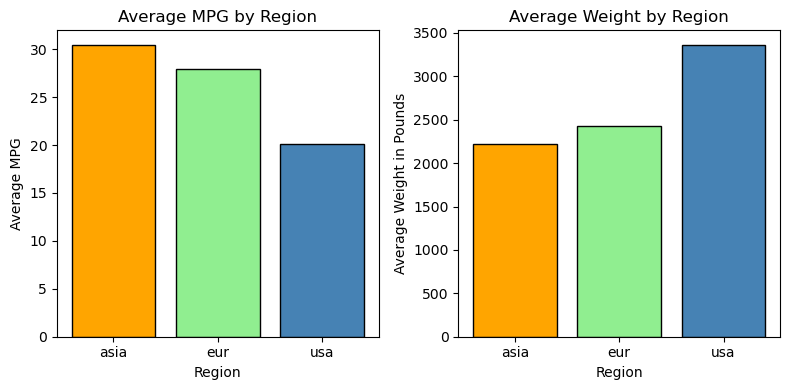

In [70]:
# Create a list named colors1 containing three named colors that display well and are easy to distinguish from one another.
colors1 = ['orange', 'lightgreen', 'steelblue']

# The figure size should be [8,4].
plt.figure(figsize=[8,4])

# Use the DataFrame mean_df from Problem 5 to create a single figure with two side-by-side bar charts.
# Each bar chart should have three bars, one for each region. 
# The heights of the bars in the left plot should indicate the average MPG of vehicles in each region. 
# The bars should be labeled according to the region they represent.
# The colors of the bars in each plot should be set using the colors1 list.
# Each bar should have a black border.
plt.subplot(1,2, 1)
plt.bar(x=regions, height=mean_df.loc[:, 'mpg'], color=colors1, edgecolor='black')
# • The x-axis of the plots should be labeled "Region".
plt.xlabel('Region')
# The title of the left plot should be "Average MPG by Region". 
plt.title('Average MPG by Region')
# The y-axes of the plot should be labeled "Average MPG"
plt.ylabel('Average MPG')

# The heights of the bars in the right plot should indicate the average weight of vehicles in each region.
plt.subplot(1,2, 2)
plt.bar(x=regions, height=mean_df.loc[:, 'wt'], color=colors1, edgecolor='black')
plt.xlabel('Region')
# The y-axes of the plot should be labeled "Average Weight in Pounds".
plt.ylabel('Average Weight in Pounds')
# The title of the right plot should be "Average Weight by Region".
plt.title('Average Weight by Region')

# Call plt.tight_layout() to prevent elements of your subplots from overlapping.
plt.tight_layout()
# Use plt.show() to display the figure.
plt.show()